In [74]:
import pandas as pd
import plotly.express as px

In [75]:
hi_ic = pd.read_csv('high_ic_results.csv')
hi_ic['IC'] = 'Diluted Hi IC'
hi_ic = hi_ic[~(hi_ic['Accession'] == 'controlPos')]
low_ic = pd.read_csv('low_ic_results.csv')
low_ic['IC'] = 'Low IC'
low_ic_new_neg = pd.read_csv('new_low_ic_results.csv')
low_ic_new_neg['IC'] = 'Low IC - New Neg Ctrl'
low_ic_new_neg = low_ic_new_neg[low_ic_new_neg['Library Type'] == 'DNA']
low_ic_new_neg_2 = pd.read_csv('new_low_ic_results_2.csv')
low_ic_new_neg_2['IC'] = 'Low IC - New Neg Ctrl'
low_ic_new_neg_2 = low_ic_new_neg_2[low_ic_new_neg_2['Library Type'] == 'DNA']
low_ic_new_neg_remove = ['IDBD-D101028', 'IDBD-R002173', 'IDBD-R002174',
                         'IDBD-R002171', 'controlPos']
low_ic_new_neg = low_ic_new_neg[~low_ic_new_neg['Accession'].isin(low_ic_new_neg_remove)]
low_ic_new_neg_2 = low_ic_new_neg_2[~low_ic_new_neg_2['Accession'].isin(low_ic_new_neg_remove)]
merged = pd.concat([hi_ic, low_ic], ignore_index=True)
merged = merged.sort_values(['Batch ID', 'Run Date'])
merged_with_new_neg = pd.concat([hi_ic, low_ic, low_ic_new_neg, low_ic_new_neg_2], ignore_index=True)
merged_with_new_neg = merged_with_new_neg.drop_duplicates(['Seq Sple'])
merged_with_new_neg = merged_with_new_neg.sort_values(['Batch ID', 'Run Date'])

/home/jmontgomery/.local/share/virtualenvs/lab_analysis-DwXlSoLZ/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.


/home/jmontgomery/.local/share/virtualenvs/lab_analysis-DwXlSoLZ/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




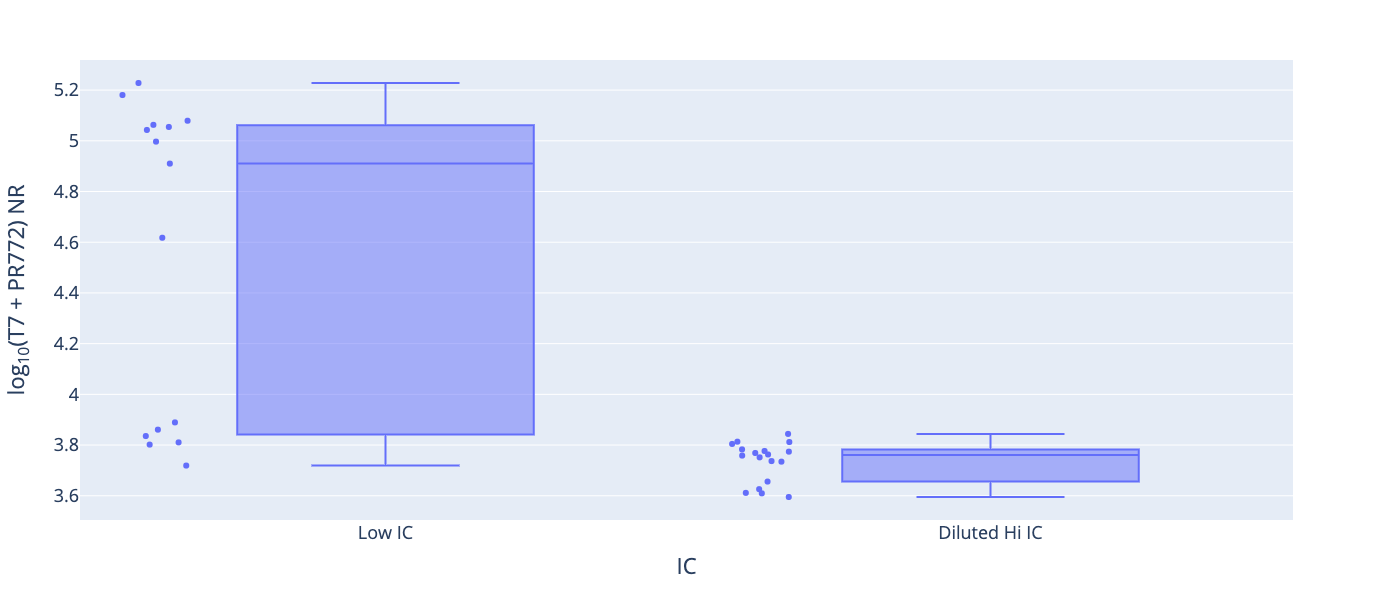

In [76]:
fig = px.box(
    merged, y='Log10 T7 + PR772 NR (Composition File)',
    x='IC', hover_data=['T7 + PR772 NR (Composition File)', 'Accession', 'Batch ID', 'Run Date'], points='all',
    labels={'Log10 T7 + PR772 NR (Composition File)': 'log<sub>10</sub>(T7 + PR772) NR',
            'T7 + PR772 NR (Composition File)': 'T7 + PR772 NR'})
fig.update_layout(font=dict(size=18), height=600)
fig.show()
fig.write_html('plots/Diluted_Hi_IC_vs_Low_IC.html')

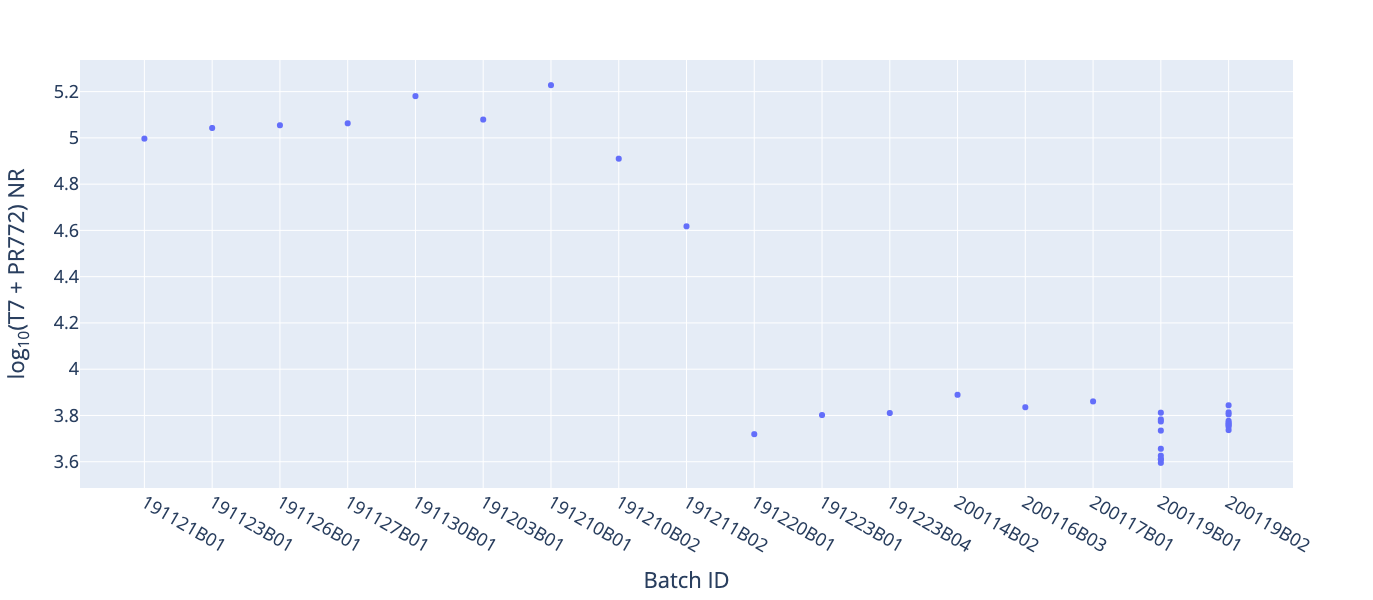

In [77]:
fig = px.scatter(
    merged, y='Log10 T7 + PR772 NR (Composition File)',
    x='Batch ID',
    labels={'Log10 T7 + PR772 NR (Composition File)': 'log<sub>10</sub>(T7 + PR772) NR',
            'T7 + PR772 NR (Composition File)': 'T7 + PR772 NR'},
    hover_data=['T7 + PR772 NR (Composition File)', 'Accession', 'Run Date']
)
fig.update_layout(font=dict(size=18), height=600)
fig.show()
fig.write_html('plots/Diluted_Hi_IC_vs_Low_IC_by_batch.html')

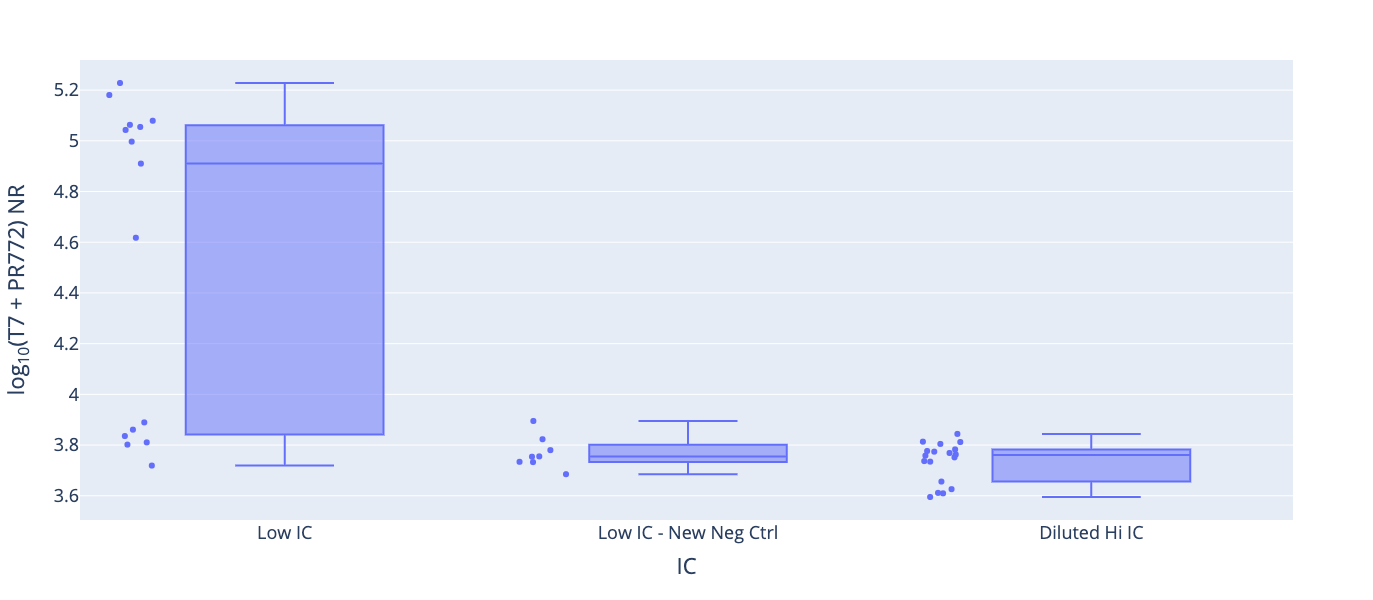

In [78]:
fig = px.box(
    merged_with_new_neg, y='Log10 T7 + PR772 NR (Composition File)',
    x='IC', hover_data=['T7 + PR772 NR (Composition File)', 'Accession', 'Sample Name', 'Batch ID', 'Run Date'], points='all',
    labels={'Log10 T7 + PR772 NR (Composition File)': 'log<sub>10</sub>(T7 + PR772) NR',
            'T7 + PR772 NR (Composition File)': 'T7 + PR772 NR'})
fig.update_layout(font=dict(size=18), height=600)
fig.show()
# fig.write_html('plots/Diluted_Hi_IC_vs_Low_IC.html')

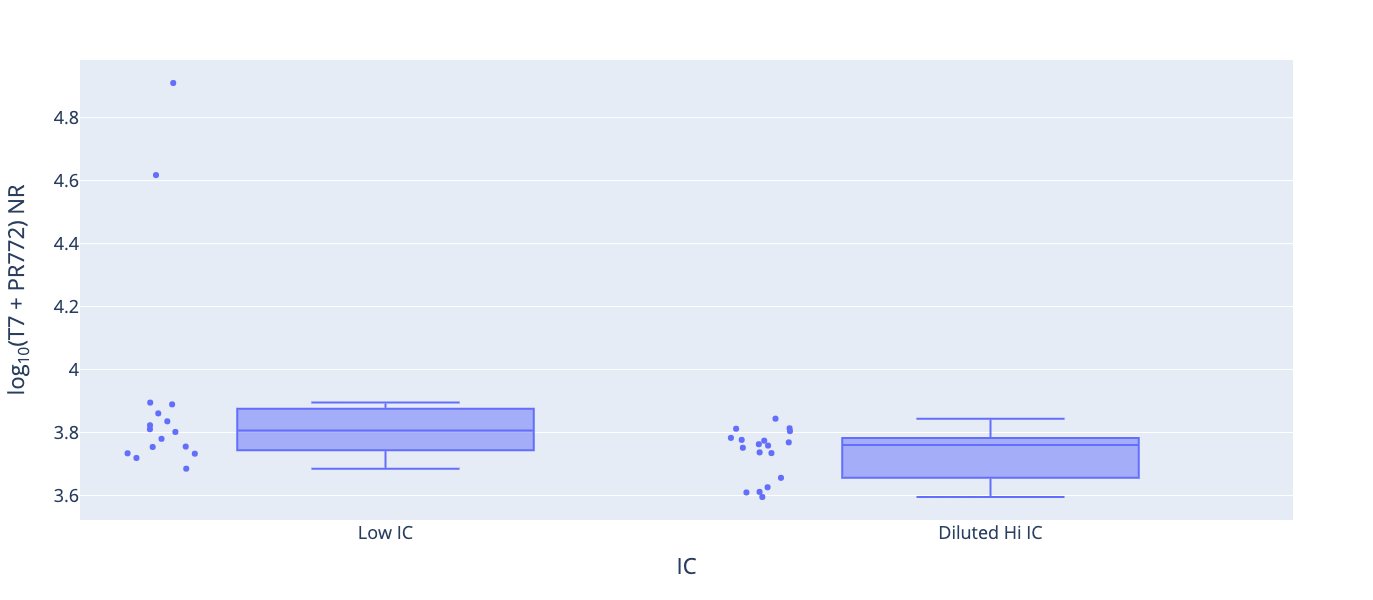

In [79]:
merged_recent = merged_with_new_neg[merged_with_new_neg['Run Date'] > '2019-12-10']
merged_recent = merged_recent.replace({'Low IC - New Neg Ctrl': 'Low IC'})
fig = px.box(
    merged_recent, y='Log10 T7 + PR772 NR (Composition File)',
    x='IC', hover_data=['T7 + PR772 NR (Composition File)', 'Accession', 'Sample Name', 'Batch ID', 'Run Date'], points='all',
    labels={'Log10 T7 + PR772 NR (Composition File)': 'log<sub>10</sub>(T7 + PR772) NR',
            'T7 + PR772 NR (Composition File)': 'T7 + PR772 NR'})
fig.update_layout(font=dict(size=18), height=600)
fig.show()
# fig.write_html('plots/Diluted_Hi_IC_vs_Low_IC.html')

In [80]:
merged_recent

,Accession,Bacteria,Batch ID,Composition File,Fungus,Human,IC,Library Type,Log10 T7 + PR772 NR,Log10 T7 + PR772 NR (Composition File),...,T7 + PR772 NR,T7 + PR772 NR (Composition File),T7 Normalized (Composition File),T7 Normalized Reads,T7 Raw Reads,T7 Raw Reads (Composition File),Total Reads,Total Reads (Composition File),Unclassified,Virus
25,controlneg,34.146415,191210B02,191211-1-1-RespNegCon01-d-09-AHVYMFAFXY-ACACAG...,0.100799,1.573661,Low IC,NaN,NaN,4.910073,...,NaN,81296.709281,81159.047873,NaN,NaN,21224,NaN,NaN,62.813562,1.243541
33,IDBD-D101029,33.249419,191210B02,191211-1-1-IDBD-D101029-d-02-AHVYMFAFXY-ACCGTT...,0.061435,0.041147,Low IC,DNA,3.901131,3.779918,...,7963.995103,6024.460948,6009.579612,7949.113767,3205.0,2423,4031896.0,4031896.0,66.498689,0.077209
34,IDBD-D101030,33.417406,191210B02,191211-1-1-IDBD-D101030-d-03-AHVYMFAFXY-TATGCC...,0.068087,0.060323,Low IC,DNA,3.874017,3.753969,...,7481.993233,5675.047209,5675.047209,7481.993233,2178.0,1652,2910989.0,2910989.0,66.308358,0.073480
35,IDBD-D101031,33.491377,191210B02,191211-1-1-IDBD-D101031-d-04-AHVYMFAFXY-ACAAGT...,0.059808,0.050722,Low IC,DNA,3.862012,3.732711,...,7277.998625,5403.951341,5400.962429,7277.998625,2435.0,1807,3345700.0,3345700.0,66.250800,0.071196
36,IDBD-D101032,33.475486,191210B02,191211-1-1-IDBD-D101032-d-05-AHVYMFAFXY-TGGTAC...,0.058715,0.102396,Low IC,DNA,3.862295,3.733888,...,7282.745895,5418.615710,5410.716853,7274.847039,2763.0,2055,3798018.0,3798018.0,66.216063,0.071643
26,controlneg,59.803104,191211B02,191212-2-1-RespNegCon01-d-09-AHW3MKAFXY-ATGGTT...,0.273989,4.550462,Low IC,NaN,NaN,4.617628,...,NaN,41459.849371,41452.620103,NaN,NaN,5734,NaN,NaN,34.647638,0.607981
38,IDBD-D101074,34.955622,191211B02,191212-2-1-IDBD-D101074-d-03-AHW3MKAFXY-TAAGCA...,0.080074,2.173085,Low IC,DNA,3.932878,3.822968,...,8567.978314,6652.236668,6636.218762,8553.562198,5340.0,4143,6243013.0,6243013.0,62.621478,0.084543
39,IDBD-D101075,42.092449,191211B02,191212-2-1-IDBD-D101075-d-04-AHW3MKAFXY-ACCACG...,0.078577,0.338251,Low IC,DNA,3.802342,3.685078,...,6343.684233,4842.589013,4840.441524,6343.684233,2954.0,2254,4656600.0,4656600.0,57.349869,0.064554
40,IDBD-D101076,39.272358,191211B02,191212-2-1-IDBD-D101076-d-05-AHW3MKAFXY-GCCGCA...,0.179225,0.701976,Low IC,DNA,3.854082,3.755276,...,7146.309422,5692.139847,5675.656817,7129.826392,3893.0,3099,5460161.0,5460161.0,59.658094,0.086518
41,IDBD-D101077,36.180811,191211B02,191212-2-1-IDBD-D101077-d-06-AHW3MKAFXY-CCACCA...,0.081385,0.061952,Low IC,DNA,4.004766,3.894947,...,10110.339013,7851.406422,7830.365134,10089.297724,6713.0,5210,6653585.0,6653585.0,63.499151,0.099495


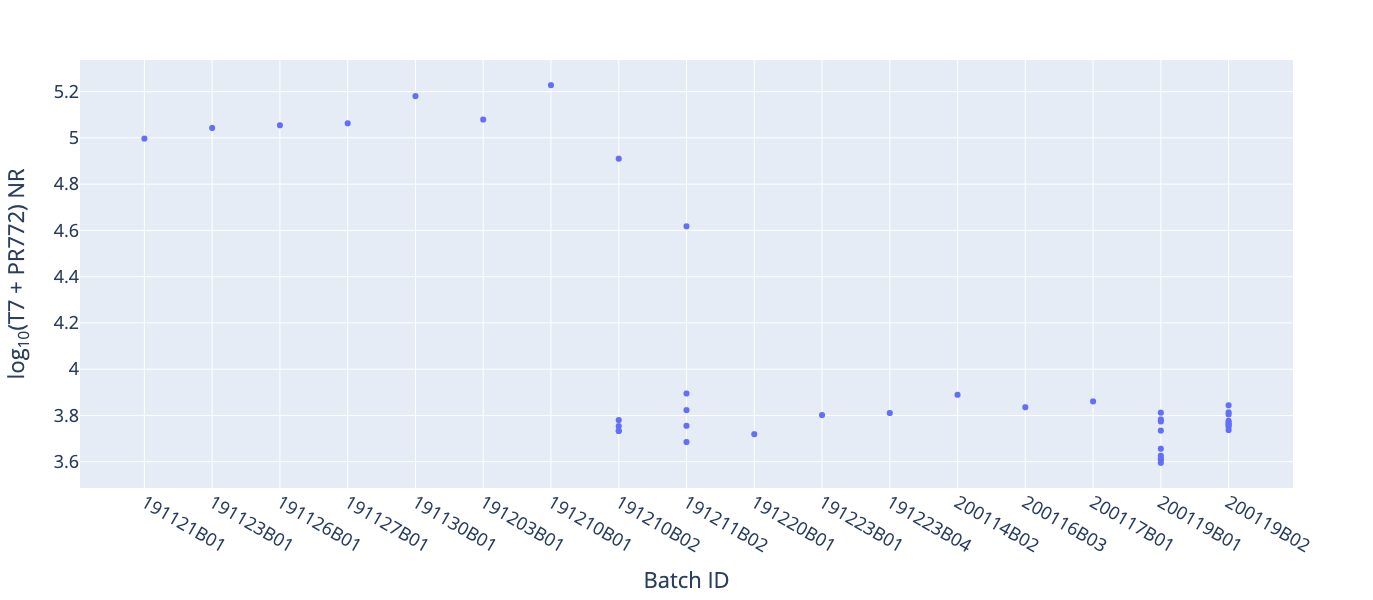

In [81]:
fig = px.scatter(
    merged_with_new_neg, y='Log10 T7 + PR772 NR (Composition File)',
    x='Batch ID',
    labels={'Log10 T7 + PR772 NR (Composition File)': 'log<sub>10</sub>(T7 + PR772) NR',
            'T7 + PR772 NR (Composition File)': 'T7 + PR772 NR'},
    hover_data=['T7 + PR772 NR (Composition File)', 'Accession', 'Run Date']
)
fig.update_layout(font=dict(size=18), height=600)
fig.show()
fig.write_html('plots/Diluted_Hi_IC_vs_Low_IC_by_batch.html')

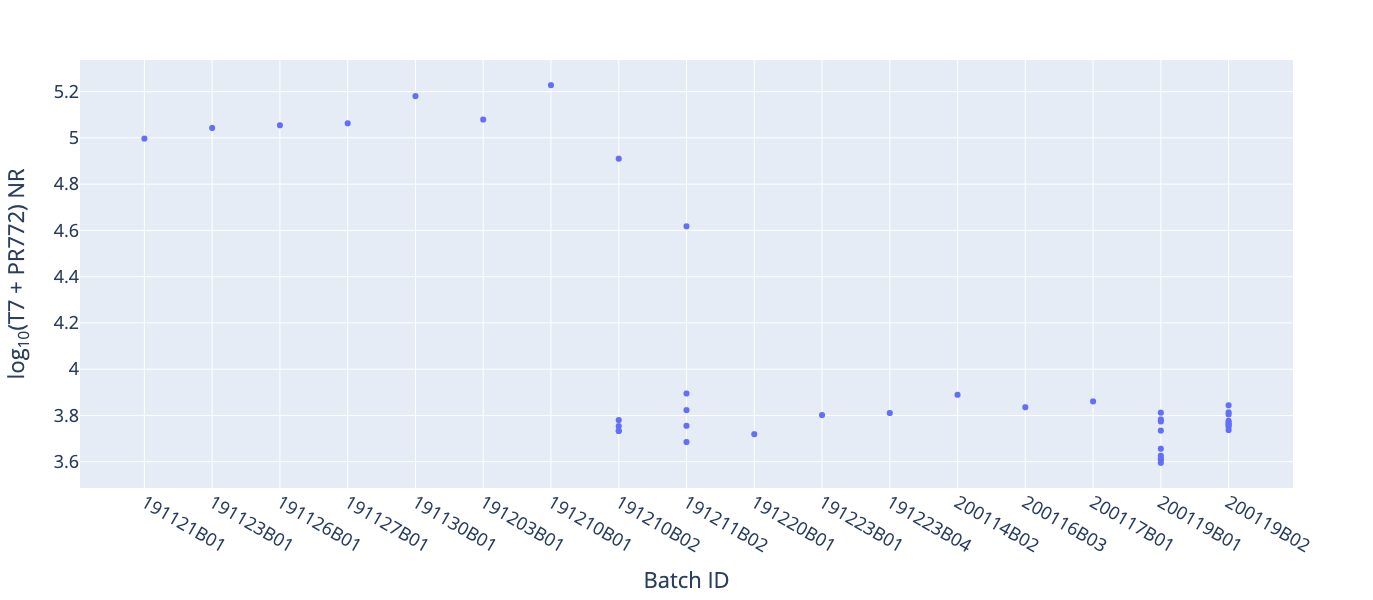

In [82]:
fig = px.scatter(
    merged_with_new_neg, y='Log10 T7 + PR772 NR (Composition File)',
    x='Batch ID',
    labels={'Log10 T7 + PR772 NR (Composition File)': 'log<sub>10</sub>(T7 + PR772) NR',
            'T7 + PR772 NR (Composition File)': 'T7 + PR772 NR'},
    hover_data=['T7 + PR772 NR (Composition File)', 'Accession', 'Run Date']
)
fig.update_layout(font=dict(size=18), height=600)
fig.show()
fig.write_html('plots/Diluted_Hi_IC_vs_Low_IC_by_batch.html')

In [83]:
merged_with_new_neg.columns

Index(['Accession', 'Bacteria', 'Batch ID', 'Composition File', 'Fungus',
       'Human', 'IC', 'Library Type', 'Log10 T7 + PR772 NR',
       'Log10 T7 + PR772 NR (Composition File)', 'PR772 Normalized Reads',
       'PR772 Raw Reads', 'Parasite', 'Run Date', 'Sample Name', 'Seq Sple',
       'Summary - Composition (log10)', 'T4 Normalized (Composition File)',
       'T4 Raw Reads (Composition File)', 'T7 + PR772 NR',
       'T7 + PR772 NR (Composition File)', 'T7 Normalized (Composition File)',
       'T7 Normalized Reads', 'T7 Raw Reads',
       'T7 Raw Reads (Composition File)', 'Total Reads',
       'Total Reads (Composition File)', 'Unclassified', 'Virus'],
      dtype='object')

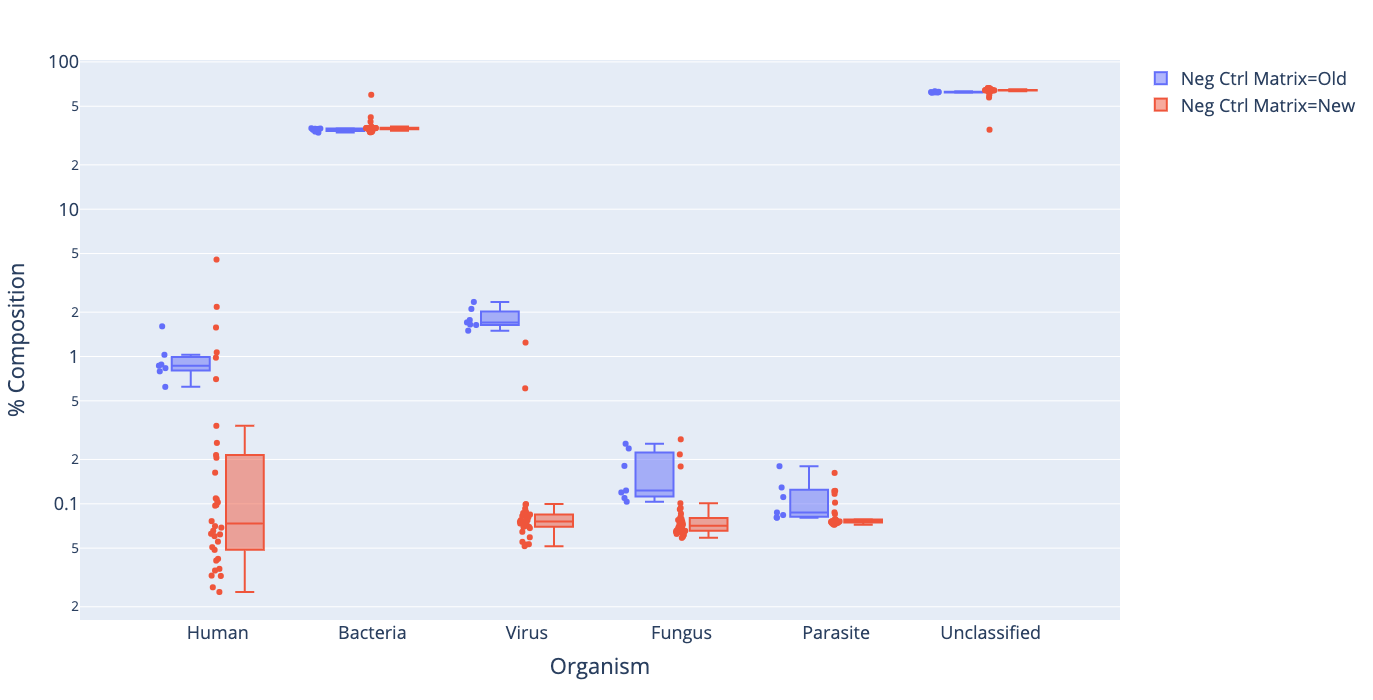

DNA    156
Name: Library Type, dtype: int64


In [87]:
merged_melt = pd.melt(
    merged_with_new_neg,
    id_vars=['Accession', 'Batch ID', 'Run Date', 'Library Type', 'Composition File'],
    value_vars=['Human', 'Bacteria', 'Virus', 'Fungus', 'Parasite', 'Unclassified'],
    value_name='% Composition',
    var_name='Organism'
)
merged_melt['Neg Ctrl Matrix'] = 'New'
merged_melt.loc[merged_melt['Run Date'] < '2019-12-11', 'Neg Ctrl Matrix'] = 'Old'
merged_melt.loc[(merged_melt['Batch ID'].isin(['191210B02', '191211B02']))
                & (merged_melt['Accession'] == 'controlNeg'), 'Neg Ctrl Matrix'] = 'Old'
merged_melt = merged_melt.sort_values('Run Date')
fig = px.box(merged_melt, x='Organism', y='% Composition',
             color='Neg Ctrl Matrix', log_y=True,
             category_orders={'Organism': ['Human', 'Bacteria', 'Virus', 'Fungus', 'Parasite', 'Unclassified']},
             points='all', hover_data=['Run Date'])
fig.update_layout(height=700, font=dict(size=18))
fig.show()
print(merged_melt['Library Type'].value_counts())